### SGD（確率的勾配降下法）で偶数（0,2,4,6,8）と奇数（1,3,5,7,9）を分類

### recall precision vs threshold curve
### recall precision curve
### ROCグラフを表示

recall precision vs threshold curve


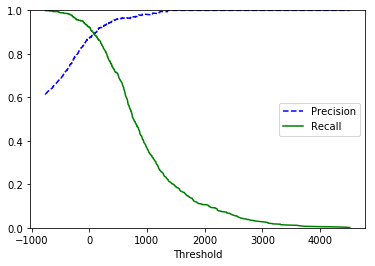

recall precision curve


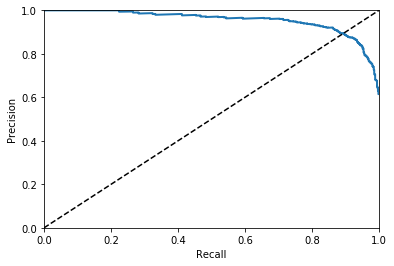

ROC curve


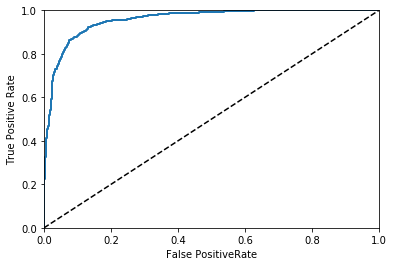

In [2]:
# -*- coding: utf-8 -*-
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve
import numpy as np
import matplotlib.pyplot as plt

def fb_score(beta):
  return (1+beta**2)*(prec*rec)/((beta**2*prec)+rec)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="center right")
  plt.ylim([0,1])
  
def plot_recall_precision_curve(recalls, precisions, label=None):
  plt.plot(recalls, precisions, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('Recall')
  plt.ylabel('Precision')

  
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('False PositiveRate')
  plt.ylabel('True Positive Rate')

#データの読み込み
#引数2-10 引数無し→10
digits = load_digits()

# label:0-9 -> 5 or 0  -> even or odd  
digits.target=[True if digits.target[t] in {0,2,4,6,8}  else False for t in range(len(digits.target))]
digits.target=np.array(digits.target)


#トレーニングデータとテストデータに分割
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, test_size=0.20)


#SVC
#estimator = LinearSVC(random_state=0, max_iter=100000)
#svc_clf= SVC(C=1.0, kernel='rbf', gamma='auto')
#svc_clf.fit(data_train, label_train)
#svc_scores=cross_val_predict(svc_clf, data_train, label_train, cv=5, method="decision_function")
#svc_precisions, svc_recalls, svc_thresholds = precision_recall_curve(label_train, svc_scores)


#SGD
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(data_train, label_train)
sgd_scores=cross_val_predict(sgd_clf, data_train, label_train, cv=5, method="decision_function")
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(label_train, sgd_scores)

# recall precision vs threshold curve
print("recall precision vs threshold curve")
plot_precision_recall_vs_threshold(sgd_precisions, sgd_recalls, sgd_thresholds)
plt.show()

# recall_precision_curve
print("recall precision curve")
plot_recall_precision_curve(sgd_recalls, sgd_precisions)
plt.show()

# ROC curve
print("ROC curve")
fpr, tpr, thresholds = roc_curve(label_train, sgd_scores)
plot_roc_curve(fpr, tpr)
plt.show()
